# PyTorch Neural Network Classification

In [1]:
import torch
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt

In [52]:
# Creating our simple dataset
n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 3e-2,
                    random_state = 42)
circles = pd.DataFrame({
    "x": X[:, 0],
    "y": X[:, 1],
    "label": y
})
circles.describe()

,x,y,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


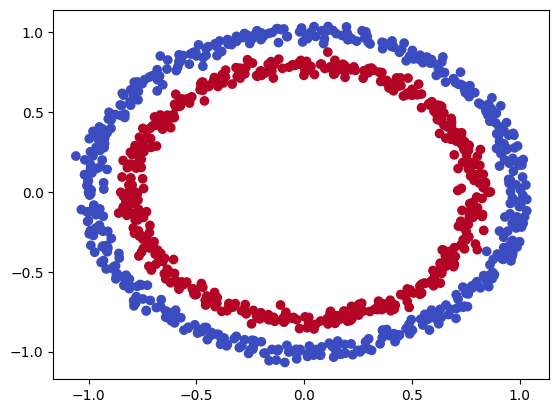

In [53]:
# Let's visualize the data
plt.scatter(x = circles["x"],
            y = circles["y"],
            c = circles["label"],
            cmap=plt.cm.coolwarm)

**Data Preprocessing**

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

**Creating a binary classification model**

In [55]:
class BinaryClassificationModel(nn.Module):
  def __init__(self, in_features: int = 1,
               hidden_features: int = 5,
               out_features: int = 1):
    super().__init__()
    self.layer_1 = nn.Linear(in_features, hidden_features)
    self.layer_2 = nn.Linear(hidden_features, hidden_features)
    self.layer_3 = nn.Linear(hidden_features, out_features)
    self.relu = nn.ReLU()
  def forward(self, x: float):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

**Training loop**

In [56]:
model = BinaryClassificationModel(in_features = 2,
                                  hidden_features = 10,
                                  out_features = 1)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3)
loss_fn = nn.BCEWithLogitsLoss()
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc
epochs = 500
for epoch in tqdm.tqdm(range(epochs)):
  model.train()
  logits = model(X_train).squeeze()
  predictions = torch.round(torch.sigmoid(logits))
  loss = loss_fn(logits, y_train)
  acc = accuracy_fn(predictions, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  if epoch%30==0:
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      preds = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(preds, y_test)
      print(f"TRAIN -> Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} || TEST -> Epoch: {epoch} | Loss: {test_loss} | Accuracy: {test_acc}")


 24%|██▎       | 118/500 [00:00<00:00, 579.21it/s]

TRAIN -> Epoch: 0 | Loss: 0.7036247849464417 | Accuracy: 50.0 || TEST -> Epoch: 0 | Loss: 0.7023689150810242 | Accuracy: 50.0
TRAIN -> Epoch: 30 | Loss: 0.6946060657501221 | Accuracy: 50.0 || TEST -> Epoch: 30 | Loss: 0.6933992505073547 | Accuracy: 50.0
TRAIN -> Epoch: 60 | Loss: 0.6890529990196228 | Accuracy: 50.125 || TEST -> Epoch: 60 | Loss: 0.6881619095802307 | Accuracy: 53.0
TRAIN -> Epoch: 90 | Loss: 0.6840245127677917 | Accuracy: 54.75 || TEST -> Epoch: 90 | Loss: 0.6836780309677124 | Accuracy: 56.99999999999999


 47%|████▋     | 234/500 [00:00<00:00, 564.97it/s]

TRAIN -> Epoch: 120 | Loss: 0.6777237057685852 | Accuracy: 55.875 || TEST -> Epoch: 120 | Loss: 0.6783933639526367 | Accuracy: 57.99999999999999
TRAIN -> Epoch: 150 | Loss: 0.6686592102050781 | Accuracy: 68.5 || TEST -> Epoch: 150 | Loss: 0.6708856225013733 | Accuracy: 69.5
TRAIN -> Epoch: 180 | Loss: 0.6559376120567322 | Accuracy: 77.875 || TEST -> Epoch: 180 | Loss: 0.6602706909179688 | Accuracy: 76.5
TRAIN -> Epoch: 210 | Loss: 0.6383106112480164 | Accuracy: 82.125 || TEST -> Epoch: 210 | Loss: 0.6461575031280518 | Accuracy: 77.0


 70%|██████▉   | 349/500 [00:00<00:00, 550.18it/s]

TRAIN -> Epoch: 240 | Loss: 0.6145434379577637 | Accuracy: 85.25 || TEST -> Epoch: 240 | Loss: 0.6280142068862915 | Accuracy: 80.5
TRAIN -> Epoch: 270 | Loss: 0.5850080847740173 | Accuracy: 90.25 || TEST -> Epoch: 270 | Loss: 0.6036929488182068 | Accuracy: 87.0
TRAIN -> Epoch: 300 | Loss: 0.5493392944335938 | Accuracy: 95.25 || TEST -> Epoch: 300 | Loss: 0.5706519484519958 | Accuracy: 90.5
TRAIN -> Epoch: 330 | Loss: 0.507554829120636 | Accuracy: 97.75 || TEST -> Epoch: 330 | Loss: 0.531291663646698 | Accuracy: 94.5


 92%|█████████▏| 462/500 [00:00<00:00, 557.78it/s]

TRAIN -> Epoch: 360 | Loss: 0.4618423283100128 | Accuracy: 98.5 || TEST -> Epoch: 360 | Loss: 0.4890711009502411 | Accuracy: 95.5
TRAIN -> Epoch: 390 | Loss: 0.41344383358955383 | Accuracy: 99.125 || TEST -> Epoch: 390 | Loss: 0.4413648843765259 | Accuracy: 97.5
TRAIN -> Epoch: 420 | Loss: 0.36531391739845276 | Accuracy: 99.5 || TEST -> Epoch: 420 | Loss: 0.39491987228393555 | Accuracy: 98.0
TRAIN -> Epoch: 450 | Loss: 0.3204718232154846 | Accuracy: 99.375 || TEST -> Epoch: 450 | Loss: 0.35002702474594116 | Accuracy: 98.0


100%|██████████| 500/500 [00:00<00:00, 558.93it/s]

TRAIN -> Epoch: 480 | Loss: 0.2801397740840912 | Accuracy: 99.5 || TEST -> Epoch: 480 | Loss: 0.30921217799186707 | Accuracy: 98.5


**Mutli-class classification data**

In [2]:
from sklearn.datasets import make_blobs

In [20]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED
)

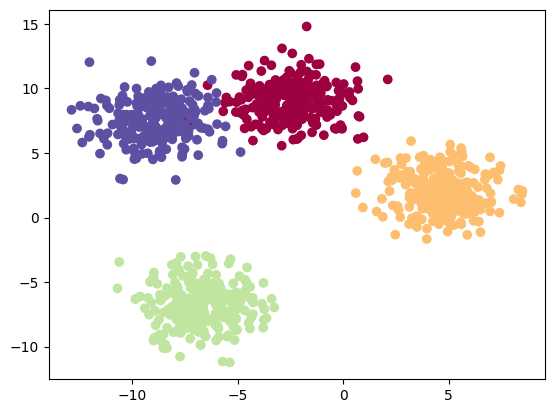

In [4]:
plt.scatter(x = X_blob[:,0],
            y = X_blob[:,1],
            c = y_blob,
            cmap=plt.cm.Spectral)

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X = torch.from_numpy(X_blob).type(torch.float).to(device)
y = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [31]:
class MultiClassificationModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


In [32]:
model = MultiClassificationModel(input_features = NUM_FEATURES,
                                 output_features = NUM_CLASSES)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3)
loss_fn = nn.CrossEntropyLoss()
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc
epochs = 500
for epoch in tqdm.tqdm(range(epochs)):
  model.train()
  logits = model(X_train)
  predictions = torch.softmax(logits, dim=1).argmax(dim=1)
  loss = loss_fn(logits, y_train)
  acc = accuracy_fn(predictions, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
      test_logits = model(X_test)
      preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(preds, y_test)
      if epoch%30==0:
        print(f"TRAIN -> Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} || TEST -> Epoch: {epoch} | Loss: {test_loss} | Accuracy: {test_acc}")


 21%|██        | 106/500 [00:00<00:00, 525.78it/s]

TRAIN -> Epoch: 0 | Loss: 1.5621898174285889 | Accuracy: 18.125 || TEST -> Epoch: 0 | Loss: 1.5627801418304443 | Accuracy: 14.499999999999998
TRAIN -> Epoch: 30 | Loss: 1.1299760341644287 | Accuracy: 64.625 || TEST -> Epoch: 30 | Loss: 1.1122088432312012 | Accuracy: 63.5
TRAIN -> Epoch: 60 | Loss: 0.8825140595436096 | Accuracy: 69.125 || TEST -> Epoch: 60 | Loss: 0.8570287823677063 | Accuracy: 69.5
TRAIN -> Epoch: 90 | Loss: 0.6896852850914001 | Accuracy: 97.125 || TEST -> Epoch: 90 | Loss: 0.6641194820404053 | Accuracy: 98.5


 42%|████▏     | 212/500 [00:00<00:00, 522.96it/s]

TRAIN -> Epoch: 120 | Loss: 0.5164674520492554 | Accuracy: 98.5 || TEST -> Epoch: 120 | Loss: 0.4951084554195404 | Accuracy: 98.5
TRAIN -> Epoch: 150 | Loss: 0.36902323365211487 | Accuracy: 98.75 || TEST -> Epoch: 150 | Loss: 0.3526483476161957 | Accuracy: 99.5
TRAIN -> Epoch: 180 | Loss: 0.2587496340274811 | Accuracy: 98.875 || TEST -> Epoch: 180 | Loss: 0.24594655632972717 | Accuracy: 100.0
TRAIN -> Epoch: 210 | Loss: 0.1848810315132141 | Accuracy: 99.0 || TEST -> Epoch: 210 | Loss: 0.17416709661483765 | Accuracy: 100.0


 63%|██████▎   | 317/500 [00:00<00:00, 505.10it/s]

TRAIN -> Epoch: 240 | Loss: 0.13760758936405182 | Accuracy: 99.0 || TEST -> Epoch: 240 | Loss: 0.12804822623729706 | Accuracy: 100.0
TRAIN -> Epoch: 270 | Loss: 0.1070491373538971 | Accuracy: 99.125 || TEST -> Epoch: 270 | Loss: 0.09820208698511124 | Accuracy: 100.0
TRAIN -> Epoch: 300 | Loss: 0.08662742376327515 | Accuracy: 99.125 || TEST -> Epoch: 300 | Loss: 0.07812748849391937 | Accuracy: 99.5
TRAIN -> Epoch: 330 | Loss: 0.07241949439048767 | Accuracy: 99.25 || TEST -> Epoch: 330 | Loss: 0.06407450884580612 | Accuracy: 99.5


 84%|████████▍ | 420/500 [00:00<00:00, 505.75it/s]

TRAIN -> Epoch: 360 | Loss: 0.06219019368290901 | Accuracy: 99.25 || TEST -> Epoch: 360 | Loss: 0.05386476591229439 | Accuracy: 99.5
TRAIN -> Epoch: 390 | Loss: 0.054662540555000305 | Accuracy: 99.25 || TEST -> Epoch: 390 | Loss: 0.0463254339993 | Accuracy: 99.5
TRAIN -> Epoch: 420 | Loss: 0.04902425408363342 | Accuracy: 99.25 || TEST -> Epoch: 420 | Loss: 0.040628574788570404 | Accuracy: 99.5
TRAIN -> Epoch: 450 | Loss: 0.0446912907063961 | Accuracy: 99.25 || TEST -> Epoch: 450 | Loss: 0.036220863461494446 | Accuracy: 99.5


100%|██████████| 500/500 [00:00<00:00, 509.13it/s]

TRAIN -> Epoch: 480 | Loss: 0.04118925705552101 | Accuracy: 99.25 || TEST -> Epoch: 480 | Loss: 0.03262298181653023 | Accuracy: 99.5


**Home work**

In [37]:
from sklearn.datasets import make_moons
from torchmetrics import Accuracy

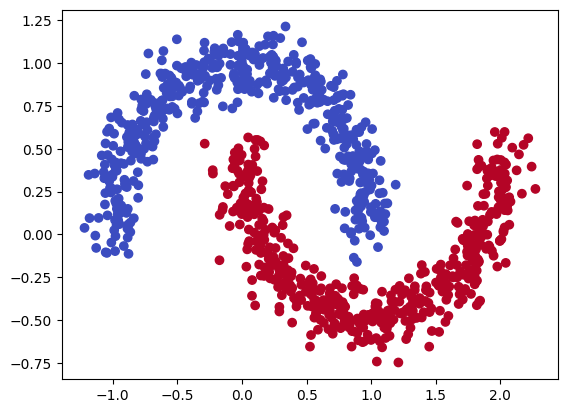

In [51]:
n_samples = 1000
X_moon, y_moon = make_moons(n_samples,
                            noise = 0.10,
                            random_state = 42)
plt.scatter(x = X_moon[:, 0],
            y = X_moon[:, 1],
            c = y_moon,
            cmap=plt.cm.coolwarm)
device = "cuda" if torch.cuda.is_available() else "cpu"
X = torch.from_numpy(X_moon).type(torch.float).to(device)
y = torch.from_numpy(y_moon).type(torch.float).to(device)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

In [38]:
class MoonsClassifier(nn.Module):
  def __init__(self,
               in_features: int = 2,
               hidden_features: int = 8,
               out_features: int = 1):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(in_features, hidden_features),
        nn.ReLU(),
        nn.Linear(hidden_features, hidden_features),
        nn.ReLU(),
        nn.Linear(hidden_features, out_features)
    )
  def forward(self, x):
    return self.linear_stack(x)

In [45]:
model = MoonsClassifier()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-2)
loss_fn = nn.BCEWithLogitsLoss()
acc_fn = Accuracy(task='multiclass', num_classes=2).to(device)
epochs = 300
for epoch in tqdm.tqdm(range(epochs)):
  model.train()
  logits = model(X_train).squeeze()
  preds = torch.round(torch.sigmoid(logits))
  loss = loss_fn(logits, y_train)
  acc = acc_fn(preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    loss = loss_fn(test_logits, y_test)
    acc = acc_fn(test_preds, y_test)
    if epoch%30==0:
      print(f"TRAIN -> Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} || TEST -> Epoch: {epoch} | Loss: {test_loss} | Accuracy: {test_acc}")


  9%|▉         | 28/300 [00:00<00:02, 114.60it/s]

TRAIN -> Epoch: 0 | Loss: 0.6831560134887695 | Accuracy: 0.5 || TEST -> Epoch: 0 | Loss: 0.030642474070191383 | Accuracy: 99.5
TRAIN -> Epoch: 30 | Loss: 0.34813839197158813 | Accuracy: 0.8149999976158142 || TEST -> Epoch: 30 | Loss: 0.030642474070191383 | Accuracy: 99.5


 37%|███▋      | 110/300 [00:00<00:00, 227.32it/s]

TRAIN -> Epoch: 60 | Loss: 0.19244742393493652 | Accuracy: 0.925000011920929 || TEST -> Epoch: 60 | Loss: 0.030642474070191383 | Accuracy: 99.5
TRAIN -> Epoch: 90 | Loss: 0.0994439497590065 | Accuracy: 0.9649999737739563 || TEST -> Epoch: 90 | Loss: 0.030642474070191383 | Accuracy: 99.5


 55%|█████▍    | 164/300 [00:00<00:00, 247.70it/s]

TRAIN -> Epoch: 120 | Loss: 0.022315677255392075 | Accuracy: 1.0 || TEST -> Epoch: 120 | Loss: 0.030642474070191383 | Accuracy: 99.5
TRAIN -> Epoch: 150 | Loss: 0.006762194912880659 | Accuracy: 1.0 || TEST -> Epoch: 150 | Loss: 0.030642474070191383 | Accuracy: 99.5


 73%|███████▎  | 218/300 [00:01<00:00, 258.84it/s]

TRAIN -> Epoch: 180 | Loss: 0.003501171711832285 | Accuracy: 1.0 || TEST -> Epoch: 180 | Loss: 0.030642474070191383 | Accuracy: 99.5
TRAIN -> Epoch: 210 | Loss: 0.002239236142486334 | Accuracy: 1.0 || TEST -> Epoch: 210 | Loss: 0.030642474070191383 | Accuracy: 99.5


 90%|█████████ | 271/300 [00:01<00:00, 250.87it/s]

TRAIN -> Epoch: 240 | Loss: 0.0015904594911262393 | Accuracy: 1.0 || TEST -> Epoch: 240 | Loss: 0.030642474070191383 | Accuracy: 99.5
TRAIN -> Epoch: 270 | Loss: 0.0012007124023512006 | Accuracy: 1.0 || TEST -> Epoch: 270 | Loss: 0.030642474070191383 | Accuracy: 99.5


100%|██████████| 300/300 [00:01<00:00, 222.76it/s]
